In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparing Dataset

In [10]:
dataset_path = '/content/drive/MyDrive/datasets/7-7-faces'
width = height = 224

image_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.1
)

train_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='training',
    shuffle=True,
    batch_size=32
)

validation_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='validation',
    shuffle=False,
    batch_size=32
)


Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [ ]:
train_data.class_indices

# Creat Model

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(width, height, 3),
    pooling='avg'
)

9406464/9406464 [==============================] - 0s 0us/step


In [12]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [13]:
model = Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(14, activation='softmax')
])

In [14]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [15]:
history = model.fit(train_data,
          validation_data=validation_data,
          epochs=32)

Epoch 1/32
39/39 [==============================] - 423s 11s/step - loss: 1.7967 - accuracy: 0.4662 - val_loss: 1.4490 - val_accuracy: 0.5496
Epoch 2/32
39/39 [==============================] - 68s 2s/step - loss: 0.8948 - accuracy: 0.7914 - val_loss: 1.1662 - val_accuracy: 0.5954
Epoch 3/32
39/39 [==============================] - 72s 2s/step - loss: 0.5959 - accuracy: 0.8549 - val_loss: 1.0107 - val_accuracy: 0.6565
Epoch 4/32
39/39 [==============================] - 68s 2s/step - loss: 0.4304 - accuracy: 0.9079 - val_loss: 0.8464 - val_accuracy: 0.6870
Epoch 5/32
39/39 [==============================] - 75s 2s/step - loss: 0.3392 - accuracy: 0.9226 - val_loss: 0.8021 - val_accuracy: 0.7176
Epoch 6/32
39/39 [==============================] - 74s 2s/step - loss: 0.2585 - accuracy: 0.9503 - val_loss: 0.7377 - val_accuracy: 0.7252
Epoch 7/32
39/39 [==============================] - 69s 2s/step - loss: 0.2130 - accuracy: 0.9625 - val_loss: 0.7031 - val_accuracy: 0.7710
Epoch 8/32
39/39 [

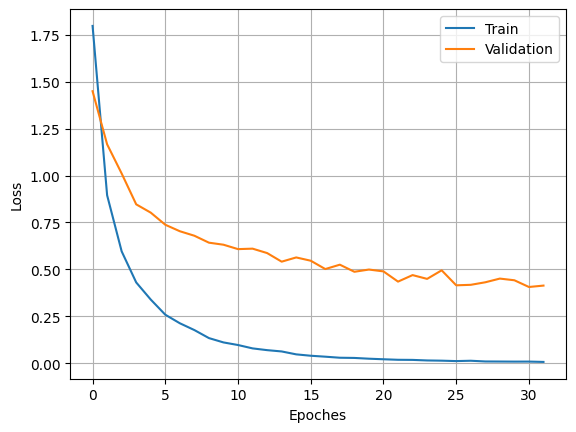

In [16]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

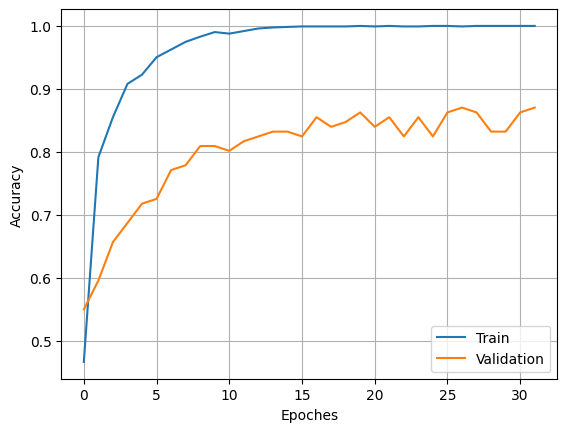

In [17]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [18]:
model.save('/content/drive/MyDrive/PyLearn 7 Course/54.TransferLearning/7_7_Faces_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Confusion Matrix

In [22]:
Y_pred = []
Y_vall = []

for i in range(len(validation_data)):
  for label in model.predict(validation_data[i][0]):
    Y_pred.append(np.argmax(label))
  for label in validation_data[i][1]:
    Y_vall.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_vall = np.array(Y_vall)

1/1 [==============================] - 1s 936ms/step


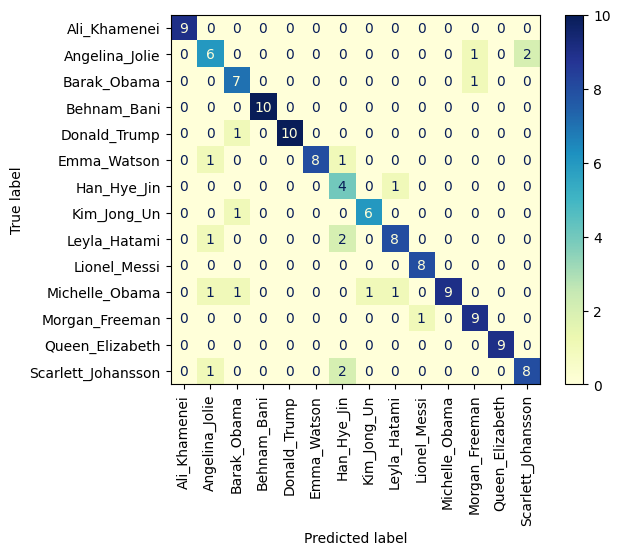

In [27]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=validation_data.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()

#Inference Code

In [37]:
indices = list(validation_data.class_indices.keys())

In [38]:
def face_recognition(img_address):
  image = cv2.imread(img_address)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  image = image / 255.0
  image = image.reshape(1, 224, 224, 3)

  output = model.predict(image)
  print(indices[np.argmax(output)])

In [41]:
face_recognition('/content/drive/MyDrive/datasets/7-7-faces/Lionel_Messi/Lionel-Messi-10_01.jpg')

1/1 [==============================] - 0s 99ms/step
Lionel_Messi
